In [3]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pytraj as pt
traj = pt.iterload('tz2.ortho.nc', 'tz2.ortho.parm7')
#traj = pt.iterload('data/tz2.ortho.nc', 'data/tz2.ortho.parm7')
traj

<pytraj.TrajectoryIterator, 10 frames, include:
<Topology: 5293 atoms, 1704 residues, 1692 mols, PBC with box type = ortho>>
           

In [7]:
# calculate rmsd to 1st frame, mask = CA
data = pt.rmsd(traj, ref=0, mask='@CA')
print(data)

[ 0.          0.26412388  0.38596881  0.26882031  0.26192277  0.45762002
  0.45645516  0.44428977  0.43628622  0.44746086]


In [9]:
# get info about unitcells
traj.unitcells

array([[ 35.26277966,  41.84554768,  36.16862953,  90.        ,
         90.        ,  90.        ],
       [ 35.2563193 ,  41.83788131,  36.16200321,  90.        ,
         90.        ,  90.        ],
       [ 35.25450718,  41.83573091,  36.16014454,  90.        ,
         90.        ,  90.        ],
       ..., 
       [ 35.24903289,  41.82923469,  36.15452962,  90.        ,
         90.        ,  90.        ],
       [ 35.26186109,  41.84445763,  36.16768736,  90.        ,
         90.        ,  90.        ],
       [ 35.27351853,  41.85829125,  36.17964426,  90.        ,
         90.        ,  90.        ]])

In [13]:
# load all coordinates to memory
xyz = traj.xyz[:]
print(xyz[0])

[[ 15.55458927  28.54844856  17.18908691]
 [ 16.20579147  29.07935524  17.74959946]
 [ 14.95065975  29.27651787  16.83513069]
 ..., 
 [  0.52251548   8.47930241  18.05087662]
 [  0.13079797   9.02361012  17.36785507]
 [ -0.17751557   8.35964298  18.69264793]]


In [16]:
# calculate bfactor
data = pt.bfactors(traj, '@CA', byres=True)
print(data)

[[  0.          10.05908339]
 [  1.           8.3347316 ]
 [  2.           7.59440762]
 ..., 
 [  9.          10.89077958]
 [ 10.          11.03991199]
 [ 11.          11.75692999]]


[[  0.           1.           2.         ...,   9.          10.          11.        ]
 [ 10.05908339   8.3347316    7.59440762 ...,  10.89077958  11.03991199
   11.75692999]]


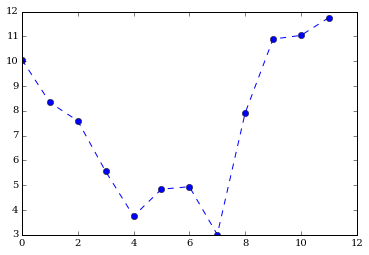

In [20]:
# plot bfactor
%matplotlib inline
from matplotlib import pyplot as plt
data = data.T
print(data)
plt.plot(data[0], data[1], '--bo')